In [541]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [542]:
# Gather data:
#np.random.seed(42)
data = np.random.normal(0, 1, 1000)
data[800:] += 0.5
np.random.shuffle(data) 


# Line them up


# Find IQR
first_quar = np.percentile(data, 25)
third_quar = np.percentile(data, 75)
IQR = third_quar - first_quar


# Find data upper/lower limits:
lower_limit = first_quar - 1.5 * IQR
upper_limit = third_quar + 1.5 * IQR 



In [543]:
first_quar

-0.5496151299734975

In [544]:
#Identify outliers smaller/larger than limits
outliers_index = np.where((data < lower_limit) | (data > upper_limit))[0]
outliers = data[outliers_index]
print("Outliers detected using IQR:", outliers)



Outliers detected using IQR: [ 2.85205826 -2.74867697 -2.63066099 -2.56665394 -2.57688338 -2.87241968
  3.01243788  2.91567732  2.82274918 -3.19103253  3.18997807 -2.58420309
  3.65923   ]


<function matplotlib.pyplot.show(close=None, block=None)>

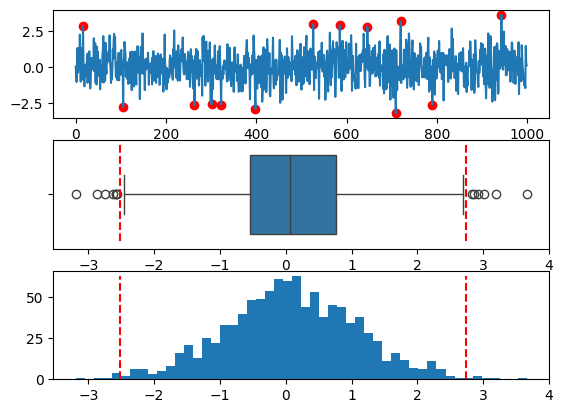

In [548]:
fig, axs = plt.subplots(3,1)
axs[2].hist(data, bins=50)
# axs[0].plot(np.max([0, np.max(np.histogram(data, bins=50)[1])], \
#                     [first_quar, np.max(np.histogram(data, bins=50)[1])], \
#                     'r--'))

axs[2].plot([lower_limit,lower_limit],[0,np.max(np.histogram(data, bins=50)[0])], 'r--')
axs[2].plot([upper_limit,upper_limit],[0,np.max(np.histogram(data, bins=50)[0])], 'r--')

#axs[0].hist(outliers, color = 'red' )
axs[0].plot(data)
#axs[1].plot([outliers_index,0], [outliers_index, outliers], 'or' )
axs[0].scatter(outliers_index, outliers, color ='red')
sns.boxplot(data=data, orient = 'h', ax=axs[1])
axs[1].plot([upper_limit,upper_limit],[-0.5,0.5], 'r--')
axs[1].plot([lower_limit,lower_limit],[-0.5,0.5], 'r--')

plt.show